# Ford GoBike System Data
## by Cynthia Leu

## Table Contents
1. Introduction
2. Preliminary Wrangling
    - Gather
    - Assess
    - Clean
3. Univariate Exploration
4. Bivariate Exploration
5. Multivariate Exploration

## Introduction

Ford GoBike is a regional public bicycle sharing system in California's San Francisco Bay Area. As of July 2018, the system had about 10,000 annual subscribers, over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. The dataset in this exploratory analysis is from their February 2019 individual trip data, provided [online](https://s3.amazonaws.com/baywheels-data/index.html) for free public use. Some questions that will be asked and answered here are: When are most trip taken in terms of time of day or day of week? How long does the average trip take? Does the above depend on if a user is a subscriber or customer?

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

## Preliminary Wrangling

### Gather

In [2]:
bike_raw = pd.read_csv('201902-fordgobike-tripdata.csv')

### Assess

In [3]:
bike_raw

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


In [4]:
bike_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
bike_raw.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [6]:
bike_raw.duplicated().sum()

0

In [7]:
bike_raw.user_type.unique()

array(['Customer', 'Subscriber'], dtype=object)

In [8]:
bike_raw.member_gender.unique()

array(['Male', nan, 'Other', 'Female'], dtype=object)

In [9]:
bike_raw.bike_share_for_all_trip.unique()

array(['No', 'Yes'], dtype=object)

In [10]:
pd.DatetimeIndex(bike_raw.start_time).year.unique()

Int64Index([2019], dtype='int64', name='start_time')

##### Quality & Tidiness
- change to datetime: start_time, end_time 
- change to str: start_station_id, end_station_id, bike_id
- change to category: user_type, member_gender, bike_share_for_all_trip
- member_age column from member_birth_year
- duration_min column from duration_sec
- additional columns from start_time and end_time (start and end date in yyyy-mm-dd format, start and end hour, start and end day of week, etc)

### Clean

Make a copy of the dataset before cleaning.

In [11]:
bike_clean = bike_raw.copy()

**Convert relevant fields to appropriate datatypes**

##### Define
Convert start_time and end_time to datetime. Convert start_station_id, end_station_id, and bike_id to string. Convert user_type, member_gender, and bike_share_for_all_trip to category.

##### Code

In [12]:
# change to datetime: start_time, end_time 
bike_clean.start_time = pd.to_datetime(bike_clean.start_time)
bike_clean.end_time = pd.to_datetime(bike_clean.end_time)

In [13]:
# change to category: start_station_id, end_station_id, bike_id
bike_clean.start_station_id = bike_clean.start_station_id.astype(str)
bike_clean.end_station_id = bike_clean.end_station_id.astype(str)
bike_clean.bike_id = bike_clean.bike_id.astype(str)

In [14]:
# change to category: user_type, member_gender, bike_share_for_all_trip
bike_clean.user_type = bike_clean.user_type.astype('category')
bike_clean.member_gender = bike_clean.member_gender.astype('category')
bike_clean.bike_share_for_all_trip = bike_clean.bike_share_for_all_trip.astype('category')

##### Test

In [15]:
bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183412 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

**member_age column from member_birth_year**

##### Define
Subtract member_ birth_year from the year of the dataset (2019). Create a new column member_age with the extracted values.

##### Code

In [16]:
bike_clean['member_age'] = 2019 - bike_clean['member_birth_year']

##### Test

In [17]:
bike_clean.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age
51895,1109,2019-02-21 17:30:11.168,2019-02-21 17:48:40.839,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,126.0,Esprit Park,37.761634,-122.390648,4608,Customer,1989.0,Female,No,30.0
85109,162,2019-02-17 16:06:15.019,2019-02-17 16:08:57.157,85.0,Church St at Duboce Ave,37.770083,-122.429156,72.0,Page St at Scott St,37.772406,-122.435650,4335,Subscriber,1931.0,Male,No,88.0
44683,149,2019-02-22 14:11:37.126,2019-02-22 14:14:06.309,243.0,Bancroft Way at College Ave,37.869360,-122.254337,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,5123,Subscriber,1997.0,Male,No,22.0
5650,1302,2019-02-28 12:19:36.881,2019-02-28 12:41:19.856,49.0,S Park St at 3rd St,37.780760,-122.394989,285.0,Webster St at O'Farrell St,37.783521,-122.431158,5348,Subscriber,1991.0,Male,No,28.0
68944,797,2019-02-19 20:33:46.856,2019-02-19 20:47:04.819,16.0,Steuart St at Market St,37.794130,-122.394430,323.0,Broadway at Kearny,37.798014,-122.405950,6636,Subscriber,1988.0,Male,No,31.0


In [18]:
bike_clean.member_age.describe()

count    175147.000000
mean         34.193563
std          10.116689
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: member_age, dtype: float64

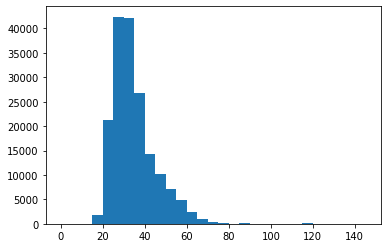

In [19]:
bins = np.arange(0, bike_clean.member_age.max()+5, 5)
plt.hist(data = bike_clean, x = 'member_age', bins = bins);

In [20]:
bike_clean[bike_clean.member_age > 65].member_age.value_counts()

67.0     189
68.0     180
69.0     178
66.0     158
72.0     135
74.0     105
70.0      99
88.0      89
119.0     53
71.0      51
76.0      30
77.0      21
86.0      20
73.0      19
80.0      11
117.0     11
78.0       9
118.0      6
99.0       3
81.0       3
75.0       2
85.0       2
91.0       1
89.0       1
92.0       1
109.0      1
141.0      1
Name: member_age, dtype: int64

**Outliers in member_age**

##### Define
Remove rows where member_age > 70. This is the age I arbitratrily chose from manually looking at member_age value counts. By querying those rows, the ones with null values in member_age will also be filtered out. Convert member_birth_year and member_age to int.

##### Code

In [21]:
bike_clean = bike_clean.query('member_age <= 70')
bike_clean.member_birth_year = bike_clean.member_birth_year.astype(int)
bike_clean.member_age = bike_clean.member_age.astype(int)

##### Test

In [22]:
bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174572 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174572 non-null  int64         
 1   start_time               174572 non-null  datetime64[ns]
 2   end_time                 174572 non-null  datetime64[ns]
 3   start_station_id         174572 non-null  object        
 4   start_station_name       174377 non-null  object        
 5   start_station_latitude   174572 non-null  float64       
 6   start_station_longitude  174572 non-null  float64       
 7   end_station_id           174572 non-null  object        
 8   end_station_name         174377 non-null  object        
 9   end_station_latitude     174572 non-null  float64       
 10  end_station_longitude    174572 non-null  float64       
 11  bike_id                  174572 non-null  object        
 12  user_type       

In [23]:
bike_clean.member_age.describe()

count    174572.000000
mean         34.035739
std           9.712795
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max          70.000000
Name: member_age, dtype: float64

**duration_min column from duration_sec**

##### Define
Divide duration_sec by 60. Create a new column duration_min with the extracted values.

##### Code

In [24]:
bike_clean['duration_min'] = round(bike_clean['duration_sec'] / 60, 1)

##### Test

In [25]:
bike_clean.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,duration_min
125818,523,2019-02-11 05:25:52.263,2019-02-11 05:34:35.951,183.0,Telegraph Ave at 19th St,37.808702,-122.269927,148.0,Horton St at 40th St,37.829705,-122.287610,5210,Subscriber,1964,Male,No,55,8.7
89229,221,2019-02-16 16:07:05.841,2019-02-16 16:10:47.067,27.0,Beale St at Harrison St,37.788059,-122.391865,50.0,2nd St at Townsend St,37.780526,-122.390288,5565,Subscriber,1994,Female,No,25,3.7
77902,258,2019-02-18 22:20:50.082,2019-02-18 22:25:09.051,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,269.0,Telegraph Ave at Carleton St,37.862320,-122.258801,5194,Subscriber,1998,Male,No,21,4.3
171937,457,2019-02-03 18:07:28.267,2019-02-03 18:15:05.314,171.0,Rockridge BART Station,37.844279,-122.251900,248.0,Telegraph Ave at Ashby Ave,37.855956,-122.259795,4552,Subscriber,1977,Female,Yes,42,7.6
45397,182,2019-02-22 12:24:28.490,2019-02-22 12:27:30.542,276.0,Julian St at The Alameda,37.332233,-121.912517,278.0,The Alameda at Bush St,37.331932,-121.904888,6626,Subscriber,1993,Male,Yes,26,3.0


**additional columns from start_time**

##### Define 
Create new columns start_date, start_day, and start_hour using pandas.Series.dt. These columns may be useful for exploring time-related trends.  

##### Code

In [26]:
bike_clean['start_date'] = bike_clean['start_time'].dt.date
bike_clean['start_day'] = bike_clean['start_time'].dt.day_name()
bike_clean['start_hour'] = bike_clean['start_time'].dt.hour

##### Test

In [27]:
bike_clean[['start_time', 'start_date', 'start_day', 'start_hour']].sample(10)

,start_time,start_date,start_day,start_hour
156491,2019-02-06 07:47:59.735,2019-02-06,Wednesday,7
39823,2019-02-23 01:31:52.935,2019-02-23,Saturday,1
98908,2019-02-15 02:01:34.907,2019-02-15,Friday,2
40390,2019-02-22 20:57:49.266,2019-02-22,Friday,20
131923,2019-02-09 10:26:41.902,2019-02-09,Saturday,10
159078,2019-02-05 18:23:54.471,2019-02-05,Tuesday,18
137427,2019-02-08 08:40:56.655,2019-02-08,Friday,8
145280,2019-02-07 09:54:25.574,2019-02-07,Thursday,9
11623,2019-02-27 18:22:03.362,2019-02-27,Wednesday,18
29213,2019-02-25 07:38:36.225,2019-02-25,Monday,7


**Reorder columns**

In [28]:
bike_clean.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'member_age', 'duration_min', 'start_date', 'start_day', 'start_hour'],
      dtype='object')

In [29]:
bike_clean = bike_clean[['duration_sec', 'duration_min', 'start_time', 'end_time', 
                         'start_date', 'start_day', 'start_hour', 
                         'start_station_id', 'start_station_name', 'start_station_latitude',
                         'start_station_longitude', 'end_station_id', 'end_station_name',
                         'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
                         'member_birth_year', 'member_age', 'member_gender', 'bike_share_for_all_trip']]

**Finalize dataset for exploration**

In [30]:
# final dataset
bike = bike_clean.copy()
bike.head()

,duration_sec,duration_min,start_time,end_time,start_date,start_day,start_hour,start_station_id,start_station_name,start_station_latitude,...,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_age,member_gender,bike_share_for_all_trip
0,52185,869.8,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,2019-02-28,Thursday,17,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,...,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,35,Male,No
2,61854,1030.9,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,2019-02-28,Thursday,12,86.0,Market St at Dolores St,37.769305,...,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,47,Male,No
3,36490,608.2,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,2019-02-28,Thursday,17,375.0,Grove St at Masonic Ave,37.774836,...,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,30,Other,No
4,1585,26.4,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,2019-02-28,Thursday,23,7.0,Frank H Ogawa Plaza,37.804562,...,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,45,Male,Yes
5,1793,29.9,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,2019-02-28,Thursday,23,93.0,4th St at Mission Bay Blvd S,37.770407,...,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,60,Male,No


In [31]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174572 entries, 0 to 183411
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174572 non-null  int64         
 1   duration_min             174572 non-null  float64       
 2   start_time               174572 non-null  datetime64[ns]
 3   end_time                 174572 non-null  datetime64[ns]
 4   start_date               174572 non-null  object        
 5   start_day                174572 non-null  object        
 6   start_hour               174572 non-null  int64         
 7   start_station_id         174572 non-null  object        
 8   start_station_name       174377 non-null  object        
 9   start_station_latitude   174572 non-null  float64       
 10  start_station_longitude  174572 non-null  float64       
 11  end_station_id           174572 non-null  object        
 12  end_station_name

In [32]:
bike.to_csv('201902-fordgobike-tripdata-clean.csv', index = False)

### What is the structure of your dataset?

After wrangling the original dataset, the final dataset to be used for data exploration has 21 variables and more than 174,000 Ford GoBike individual trip records from February 2019.

The dataset is structured in the listed general categories with their respective categories:
- trip duration: `duration_sec`, `duration_min`
- trip time: `start_time`, `end_time`, `start_day`, `start_hour`
- start station info: `start_station_id`, `start_station_name`, `start_station_latitude`, `start_station_longitude`
- end station info: `end_station_id`, `end_station_name`, `end_station_latitude`, `end_station_longitude`
- member info: `bike_id`, `user_type`, `member_birth_year`, `member_age`, `member_gender`, `bike_share_for_all_trip`

### What is/are the main feature(s) of interest in your dataset?

I'm interested in exploring the impact of time. When are most trip taken in terms of time of day or day of week? How long does the average trip take? Analyzing such questions could help the business understand demand. Another feature I'm interested in exploring is member demographic, such as a member's age or whether or not the member is a customer or subscribe. Digging into this can help us find patterns among certain groups of customers and help us target the right ones for marketing purposes.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

To explore how time trends, `duration_min`, `start_day`, and `start_hour` would be good variables to start with. To explore user information and/or member demographic, `user_type`, `member_age`, and `member_gender` would help with finding those group distributions.

## Univariate Exploration

Since time trends are of interest, start off with exploring trip frequncy by day of week.

In [33]:
# Convert the start_day column from a plain object type into an ordered categorical type
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ordered_days = pd.api.types.CategoricalDtype(ordered = True, categories = days_of_week)
bike['start_day'] = bike['start_day'].astype(ordered_days)

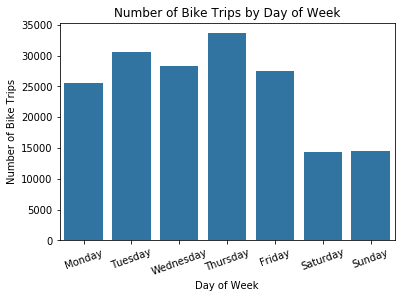

In [34]:
base_color = sb.color_palette()[0]

# Count by Day of Week
sb.countplot(data = bike, x = 'start_day', color = base_color)
plt.xticks(rotation = 20)
plt.title('Number of Bike Trips by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Bike Trips');

Bikes are primarily used on the weekdays, and on Thursdays the most. There's a large dip in usage during the weekends. Perhaps this is because the bikes are used more for work than for leisure.

Look at the distribution of hour next.

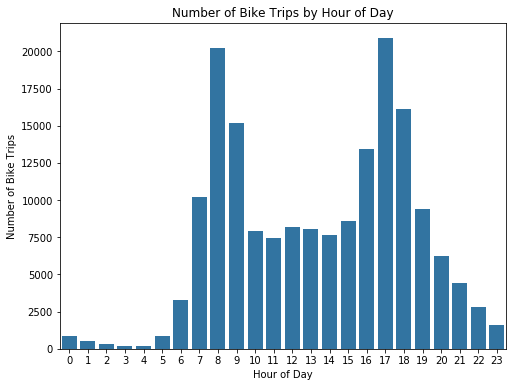

In [35]:
# Count by Hour of Day
plt.figure(figsize = [8, 6])
sb.countplot(data = bike, x = 'start_hour', color = base_color)
plt.title('Number of Bike Trips by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Bike Trips');

The distribution of bike rides by hour is bimodial. Seeing that the two peaks are at 8-9am and 5-6pm, this matches up with the previous guess that the bikes are most used during work commuting hours. 

After exploring these two distributions, dig a little deeper into trip duration.

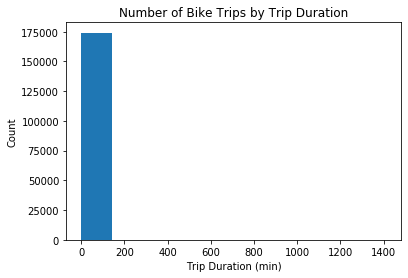

In [36]:
# Distribution of Trip Duration (before outlier removal)
plt.hist(data = bike, x = 'duration_min')
plt.title('Number of Bike Trips by Trip Duration')
plt.xlabel('Trip Duration (min)')
plt.ylabel('Count');

In [37]:
bike.duration_min.describe()

count    174572.000000
mean         11.741066
std          27.393543
min           1.000000
25%           5.400000
50%           8.500000
75%          13.200000
max        1409.100000
Name: duration_min, dtype: float64

There seems to be a couple outliers for trip duration. Zoom in for a more representative picture of the distribution.

In [38]:
bike.duration_min.describe(percentiles = [0.99])

count    174572.000000
mean         11.741066
std          27.393543
min           1.000000
50%           8.500000
99%          52.929000
max        1409.100000
Name: duration_min, dtype: float64

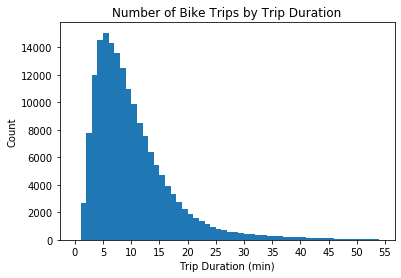

In [39]:
# Distribution of Trip Duration
bins = np.arange(0, 55, 1)
ticks = np.arange(0, 60, 5).tolist()
labels = ['{}'.format(val) for val in ticks]

plt.hist(data = bike, x = 'duration_min', bins = bins)
plt.xticks(ticks, labels)
plt.title('Number of Bike Trips by Trip Duration')
plt.xlabel('Trip Duration (min)')
plt.ylabel('Count');

After removing the outliers from the histogram, there is a much clearer picture of trip duration. The shortest trip is about 1 min long, the average trip is about 12 min, and 75% of the trips are under 13 min. It's possible that the majority of these trips are work commutes, hence explaining the relatively short durations.

Now that there's some base level understanding of these time variables, explore user demographic next.

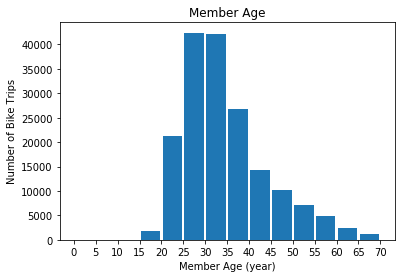

In [40]:
# Distribution of Member Age
bins = np.arange(0, bike.member_age.max()+5, 5)
plt.hist(data = bike, x = 'member_age', bins = bins, rwidth = 0.9)
plt.xticks(bins, bins)
plt.title('Member Age')
plt.xlabel('Member Age (year)')
plt.ylabel('Number of Bike Trips');

In [41]:
bike.member_age.describe()

count    174572.000000
mean         34.035739
std           9.712795
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max          70.000000
Name: member_age, dtype: float64

Most of the users fall in the age range of 25-40 years old, with the average at 34 years old. The youngest age is 18 years old, but that may be because of some age requirement to use the bikeshare. 

Now consider gender.

In [42]:
gender = bike.member_gender.value_counts()
gender

Male      130176
Female     40772
Other       3624
Name: member_gender, dtype: int64

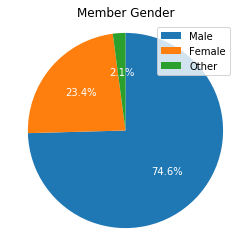

In [43]:
# Relative Frequency by Member Gender
plt.pie(gender, labels = gender.index, startangle = 90, autopct = '%1.1f%%', 
        counterclock = False, textprops = {'color':'white'})
plt.axis('square')
plt.title('Member Gender')
plt.legend(loc = 'upper right');

Unexpectedly, there are a disproportionate amount of male riders compared to female riders (and those who chose not to specify their gender). Almost 75% of all riders are male, while only 23% are female.

Are most of the riders subscribers or just casual customers?

In [44]:
user = bike.user_type.value_counts()
user

Subscriber    157959
Customer       16613
Name: user_type, dtype: int64

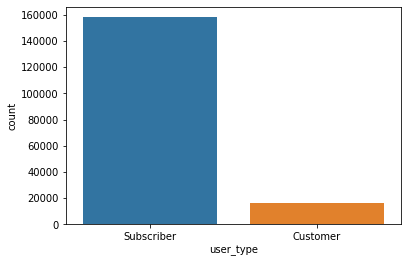

In [45]:
# Count by User Type
sb.countplot(data = bike, x = 'user_type', order = user.index);

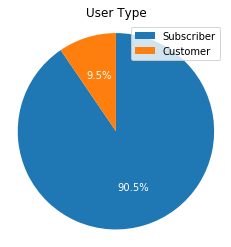

In [46]:
# Relative Frequency by User Type
plt.pie(user, labels = user.index, startangle = 90, autopct = '%1.1f%%', 
        counterclock = False, textprops = {'color':'white'})
plt.axis('square')
plt.title('User Type')
plt.legend(loc = 'upper right');

90.5% of all riders are subscribers, while the other 9.5% are customers, just casual occasional users. It'll be interesting to explore later on what the respective groups' ride behaviors are.

Since so many of these observations seem to relate back to work commuters, let's take a look at the most popular start stations.

In [47]:
top_stations = bike.start_station_name.value_counts()[0:10].sort_values()
top_stations

Powell St BART Station (Market St at 5th St)                 2143
Steuart St at Market St                                      2181
Howard St at Beale St                                        2211
San Francisco Ferry Building (Harry Bridges Plaza)           2526
San Francisco Caltrain (Townsend St at 4th St)               2552
Powell St BART Station (Market St at 4th St)                 2616
Montgomery St BART Station (Market St at 2nd St)             2705
Berry St at 4th St                                           2931
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3385
Market St at 10th St                                         3644
Name: start_station_name, dtype: int64

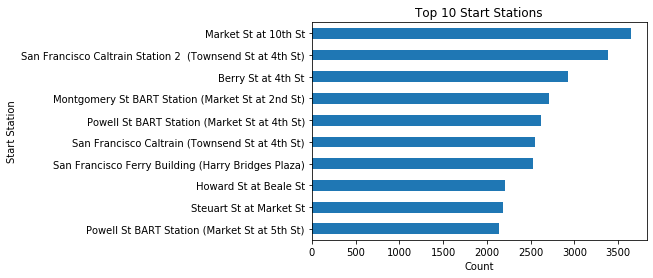

In [48]:
top_stations.plot(kind = 'barh')
plt.title('Top 10 Start Stations')
plt.xlabel('Count')
plt.ylabel('Start Station');

As suspected, most of the bike rides start around the San Francisco Financial District, where many people in the Bay Area work.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Bikes are primarily used on the weekdays, with rides peaking at 8-9am and 5-6pm. Most of the bike trips are less than 15 min. Most of the users fall in the age range of 25-40 years old, are male, and are subscribers. A lot of these observations seem to point towards that most users regularly use Ford GoBike for work commuting. Of course, more exploration of this initial hypothesis is needed.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

There was one distribution that threw me off initially. There seem to be a couple trips that lasted really long, with the longest being 1409 minutes, or about 24 hours. To remove outliers, I used describe() to look at only up to the 99th percentile and created a histogram from those values. Fortunately, there was no need for any log transformations on the dataset.

## Bivariate Exploration

Just as the previous section started off by looking at time trends, start this section by exploring hourly usage by user type.

/Users/cynthialeu/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


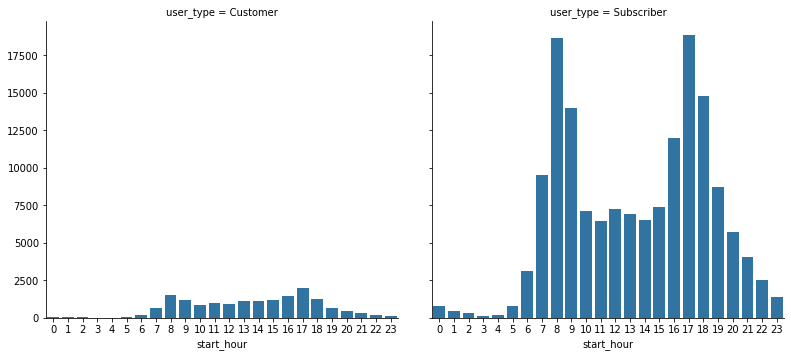

In [49]:
# Hourly Usage by User Type
g = sb.FacetGrid(data = bike, col = 'user_type')
g.map(sb.countplot, 'start_hour')
g.fig.set_figwidth(12)
g.fig.set_figheight(6);

Reaffirming what was demonstrated with the pie chart in the first section, customers really do not make up much of the user base. Customer distribution by hour is more evenly spead, but it's clear that the bimodial peaks during commute hours are dominated by subscribers. 

Next, consider trip duration by user type.

Earlier, there was an issue with outliers in duration_min that greatly skewed the distribuion. It's time to resolve it. To do so, query only the records where duration_min is arbitrarily <= 70.

In [50]:
bike = bike[bike.duration_min <= 70]

(-5.821092284445902, 76.8210922844459)

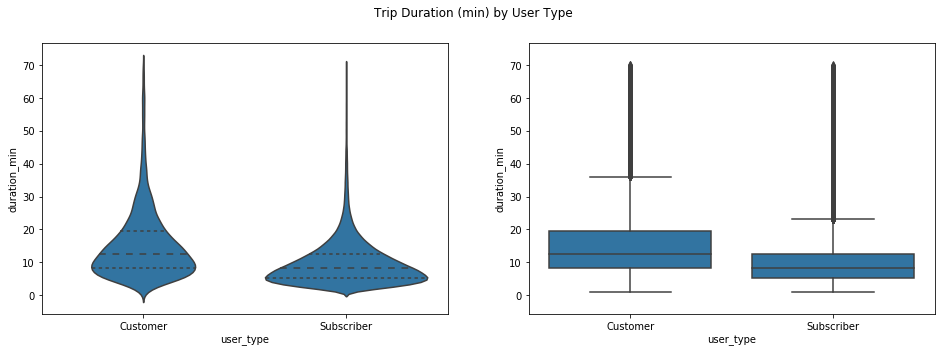

In [51]:
# Trip Duration by User Type
plt.figure(figsize = [16, 5])
base_color = sb.color_palette()[0]
plt.suptitle('Trip Duration (min) by User Type')

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = bike, x = 'user_type', y = 'duration_min', color=base_color, inner='quartile');

# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data = bike, x = 'user_type', y = 'duration_min', color=base_color);

plt.ylim(ax1.get_ylim())

The distribution for trip duration is much flatter for subscribers compared to casual riders; that is, they are taking shorter trips. Customers have a longer distribution, as there is more variety for their reasons of biking, and thus more may be renting bikes for a longer duration.

Take another look at trip duration by day of week.

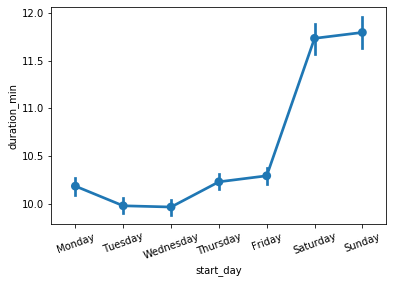

In [52]:
# Trip Duration by Day of Week
sb.pointplot(data = bike, x = 'start_day', y = 'duration_min')
plt.xticks(rotation = 20);

The average trip duration during the weekdays and weekend vary by two min. While this doesn't seem much, this is still a very general look at 170K+ records. Later in the multivariate exploration section, dig into this by user type.

Since gender hasn't been explored much, let's do that. 

In [53]:
dg_counts = bike.groupby(['start_day', 'member_gender']).size()
dg_counts = dg_counts.reset_index(name = 'count')
dg_counts = dg_counts.pivot(index = 'start_day', columns = 'member_gender', values = 'count')

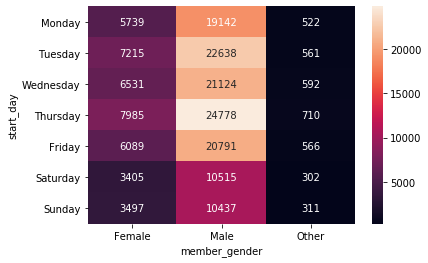

In [54]:
# Weekly Usage by Member Gender
sb.heatmap(dg_counts, annot = True, fmt = 'd')

There's nothing spectacular to point out here between the genders, as it's already known that there are almost 3x more male users than female. Tuesdays and Thursdays seem to have the most bike usage for either gender. 

Let's look at how gender and user type interact.

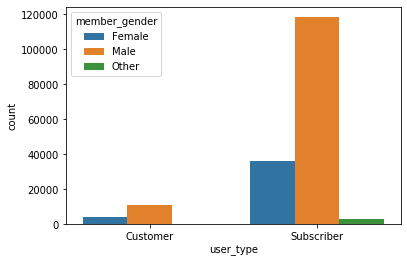

In [55]:
# Member Gender by User Type
sb.countplot(data = bike, x = 'user_type', hue = 'member_gender');

Again, nothing groundbreaking. Most subscribers are male, though the 40k count female can't be easily discounted. The bikeshare system should consider why they're not reaching out to more female customers.

Continuing the exploration of member demographic, compare member age with user type.

<Figure size 432x288 with 0 Axes>

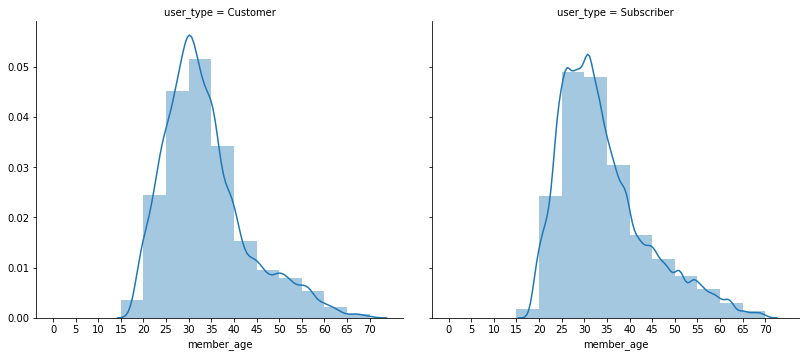

In [56]:
# Member Age by User Type
plt.suptitle('Member Age by User Type')
bins = np.arange(0, bike.member_age.max()+5, 5)
g = sb.FacetGrid(data = bike, col = 'user_type')
g.map(sb.distplot, 'member_age', bins = bins)
plt.xticks(bins, bins)
g.fig.set_figwidth(12)
g.fig.set_figheight(6);

Distribution of member age by user type doesn't have as large of a difference as expected. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

I explored user type in much greater depth in this section. First of all, there is much greater usage from subscribers. This shows to some degree that these Ford GoBike users are loyal to the service. Subscribers dominate those commuting hours, but their trips are generally shorter. On the other hand, users labeled as customers don't demonstrate as strict of a pattern. The hours when they ride seem to spead out throughout the day, and their trip durations vary as well. I expect to find a deeper relationship between user_type and these time-relevant fields in the next section.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

I thought member age would fluctuate more based on user type, but I didn't find that relationship, at least not for this particular dataset of February 2019. Trip duration on the weekends seem to be higher. This could be due to more casual users renting the bikes, or subscribers may just want to use it more for leisure than for destination purposes. There was not much to say about gender behavior, but while analyzing gender, I chanced upon that Tuesdays and Thursdays are busiest for both genders. I'm not sure why those two days are so busy.

## Multivariate Exploration

How does hourly usage vary throughout the week for subscribers v. customers?

Resource for building a heatmap: [Heatmap Basics with Seaborn](https://towardsdatascience.com/heatmap-basics-with-pythons-seaborn-fb92ea280a6c)

In [57]:
# Create a new table `subscriber` counting the number of bike rides per DOW and HOD by subscriber-only user type
subscriber = bike.query("user_type == 'Subscriber'").groupby(['start_hour', 'start_day']).size()
# df.groupby().size() counts the number of rows in each group
subscriber = subscriber.unstack(level = 0)
subscriber # total subscriber rides = 157959

start_hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
start_day,,,,,,,,,,,,,,,,,,,,,
Monday,86,42,39,19,35,124,548,1538,2957,2047,...,766,1032,1766,2987,2185,1323,857,558,344,171
Tuesday,74,51,31,16,28,164,650,2058,3918,3027,...,949,1062,2009,3643,2909,1535,1040,622,323,164
Wednesday,74,43,28,13,22,149,527,1704,3323,2407,...,842,974,1949,3492,2826,1679,1065,814,470,213
Thursday,107,41,25,17,38,161,658,2111,4155,2554,...,991,1226,2350,4048,3287,1787,1279,814,489,276
Friday,126,75,55,27,38,138,574,1814,3570,2716,...,775,1074,1849,2757,2055,1104,617,462,427,252
Saturday,187,145,66,21,19,25,88,187,440,695,...,1062,968,910,926,705,590,393,360,252,201
Sunday,136,80,72,31,19,25,49,135,284,512,...,1092,1048,1111,971,822,685,490,411,249,133


In [58]:
# Create a new table `customer` counting the number of bike rides per DOW and HOD by customer-only user type
customer = bike.query("user_type == 'Customer'").groupby(['start_hour', 'start_day']).size()
customer = customer.unstack(level = 0)
customer # total customer rides = 16613

start_hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
start_day,,,,,,,,,,,,,,,,,,,,,
Monday,10,1,1,0,3,6,38,106,225,165,...,125,133,216,306,170,91,63,46,26,8
Tuesday,3,2,2,0,1,9,28,124,310,191,...,108,123,170,313,229,116,59,45,27,12
Wednesday,8,2,0,0,1,6,34,95,250,156,...,88,109,164,312,214,101,76,53,33,25
Thursday,13,4,3,1,2,18,40,147,301,236,...,118,134,235,445,319,166,90,56,43,30
Friday,13,2,7,1,2,13,29,135,337,259,...,117,159,220,281,145,69,48,56,47,24
Saturday,22,16,6,4,5,9,2,15,53,78,...,244,207,181,146,80,67,40,35,22,32
Sunday,15,17,16,3,3,4,1,16,32,69,...,250,241,237,180,104,63,65,39,26,17


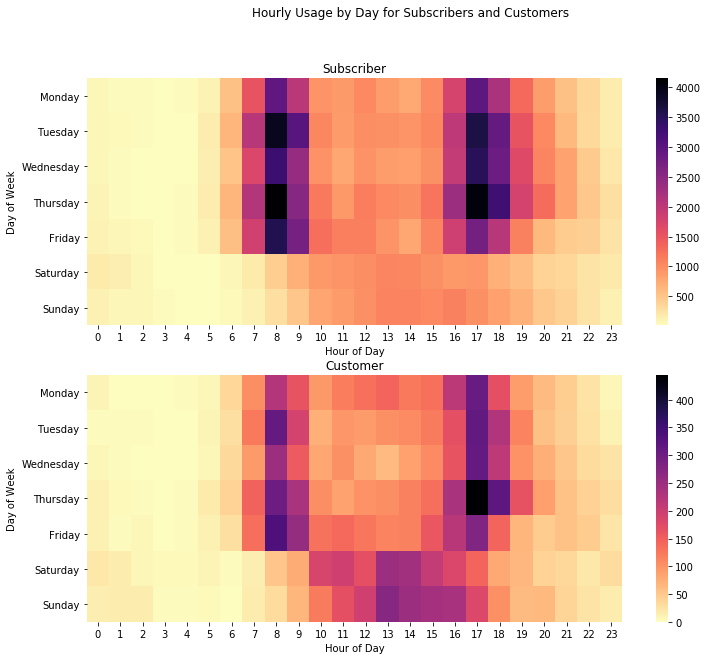

In [59]:
# Hourly Usage by Day of Week by User Type
plt.figure(figsize = [12,10]) 
plt.suptitle('Hourly Usage by Day for Subscribers and Customers')

# subscriber heatmap on top
plt.subplot(2, 1, 1) # 2 rows, 1 col, subplot 1
sb.heatmap(data = subscriber, cmap = 'magma_r')
plt.title('Subscriber')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week');
# plt.hist2d(data = subscriber, x = 'start_hour', y = 'start_day') doesn't work because start_day is categorical

# customer heat map on bottom
plt.subplot(2, 1, 2) # 2 rows, 1 col, subplot 2
sb.heatmap(data = customer, cmap = 'magma_r')
plt.title('Customer')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week');

Reaffirming previous observations, subscribers and customers have very different ride patterns. Subscribers ride most on weekdays, especially during those morning and late afternoon hours. Customers also ride fairly frequently those hours, but they also ride more during the weekends, especially during the daytime hours.

How does the average trip duration vary throughout the week for subscribers v. customers?

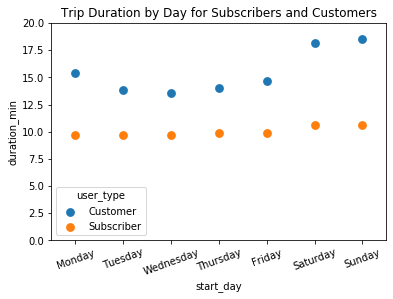

In [60]:
sb.pointplot(data = bike, x = 'start_day', y = 'duration_min', hue = 'user_type',
             ci = None, linestyles ="")
plt.title('Trip Duration by Day for Subscribers and Customers')
plt.xticks(rotation = 20)
plt.ylim(0, 20);

Again confirming earlier behaviors, this pointplot shows that subscribers make much shorter trips compared to customers, no matter which day of week. Since subscribers rent bikes for very specific reasons on the weekdays, average trip duration stays fairly constant. Duration increases slightly on the weekends for them, but even moreso for customers. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

This last section in multivariate exploration really strengthened those patterns observed from the univariate and bivariate exploration sections. Subscriber bike usage is highly concentrated on weekdays between 8-9am and 5-6pm for those regular work commuters. Since they're just going to and from work, average trip duration doesn't fluctuate much. On the other hand, customers who are most likely just casual, occasional riders, are much more flexible with why they're using the bikes. While their weekday hours are similar wih subscribers, customers also use bikes more on weekends, for longer durations on average too. One guess is that the customer group consists of tourists using bikes as a cheaper and more unique way to explore San Francisco and the Bay Area.

### Were there any interesting or surprising interactions between features?

Based on the two multivariate explorations, there was nothing too surprising. If I'm considering the previous sections, I would love to see something new or interesting in how gender and age relate to bike usage. 